INTRODUCTION:

We are going to focus on Movie genres 

RESEARCH QUESTIONS:
1. which genres are the most common(Number of moves made)?
2. Which genres have high average budget and revenue?
3. which genres have high average popularity?
4. Which genres have the highest number of movies with a voting average >= 8?


RESEARCH HYPOTHESES(H):
1. The best movies according to voting average return high profit and revenue.
2. the best movies according to popularity return high profit and revenue.
3. Highly budgeted movies return high revenue and profit.
4. Highly budgeted movies have a high popularity.

Continue to build on these questions and ask more research questions but these are the base questions

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# data set path
movies = pd.read_csv(r'/Users/mfriedman130/Desktop/data analytics practice/data analytics Python practice/imdb_movies.csv')

In [3]:
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
movies.info()
#based on tihs we can see that there are approximately 10860 rows 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
pd.set_option('display.max.rows',11000)
pd.set_option('display.max.columns',22)

In [6]:
movies[movies.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [7]:
movies.drop_duplicates(inplace = True)

In [8]:
movies.dropna(subset = ['genres'], inplace = True)
#now have no null data in genres column and deleted a few rows

In [9]:
movies['profit'] = movies['revenue'] - movies['budget']
#creates column for profit 

In [10]:
movies_genre = movies[['popularity', 'budget', 'revenue', 'original_title', 'runtime', 'genres', 'release_date', 'director', 'vote_count', 'vote_average', 'profit']]

In [11]:
movies.head(20)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",father-son relationship|rape|based on novel|mo...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08,397950503
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,saving the world|artificial intelligence|cybor...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08,285603537
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,based on novel|mars|nasa|isolation|botanist,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08,487380321
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",assistant|aftercreditsstinger|duringcreditssti...,"Minions Stuart, Kevin and Bob are recruited

In [12]:
from pandas import Series, DataFrame


In [13]:
movies_genre['genres'].str.split('|').apply(Series, 1).stack()
#we split on | and applies each piece into their own series
#using stack we are reshaping the dataframe into a multi-index

0      0             Action
       1          Adventure
       2    Science Fiction
       3           Thriller
1      0             Action
                 ...       
10863  0            Mystery
       1             Comedy
10864  0             Action
       1             Comedy
10865  0             Horror
Length: 26955, dtype: object

In [14]:
split = movies_genre['genres'].str.split('|').apply(Series, 1).stack()
split.index = split.index.droplevel(-1)
split
#now we can apply this back to the dataframe

split.name = 'genres_split'
del movies_genre['genres']
movies_genre = movies_genre.join(split)


#for now our index will have each entry for the movie with the different genres entered as seperate rows
#we may or may not fix this later, but now we can group on the genre data
#we also have more than doubles the amount of rows for our dataframe

In [15]:
movies_genre

,popularity,budget,revenue,original_title,runtime,release_date,director,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,Colin Trevorrow,5562,6.5,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,Colin Trevorrow,5562,6.5,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,Colin Trevorrow,5562,6.5,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,Colin Trevorrow,5562,6.5,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,5/13/15,George Miller,6185,7.1,228436354,Action
...,...,...,...,...,...,...,...,...,...,...,...
10863,0.065141,0,0,Beregis Avtomobilya,94,1/1/66,Eldar Ryazanov,11,6.5,0,Mystery
10863,0.065141,0,0,Beregis Avtomobilya,94,1/1/66,Eldar Ryazanov,11,6.5,0,Comedy
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,11/2/66,Woody Allen,22,5.4,0,Action
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,11/2/66,Woody Allen,22,5.4,0,Comedy


#end of cleaning
Research question 1: which genres are the most common(number of movies made)?

In [16]:
genres_count = pd.DataFrame(movies_genre.groupby('genres_split').original_title.nunique()).sort_values('original_title' , ascending= True)

In [17]:
genres_count

,original_title
genres_split,
Western,163
TV Movie,167
Foreign,188
War,269
History,331
Music,403
Documentary,520
Animation,697
Mystery,796


<AxesSubplot:title={'center':'movies per genre in %'}, ylabel='original_title'>

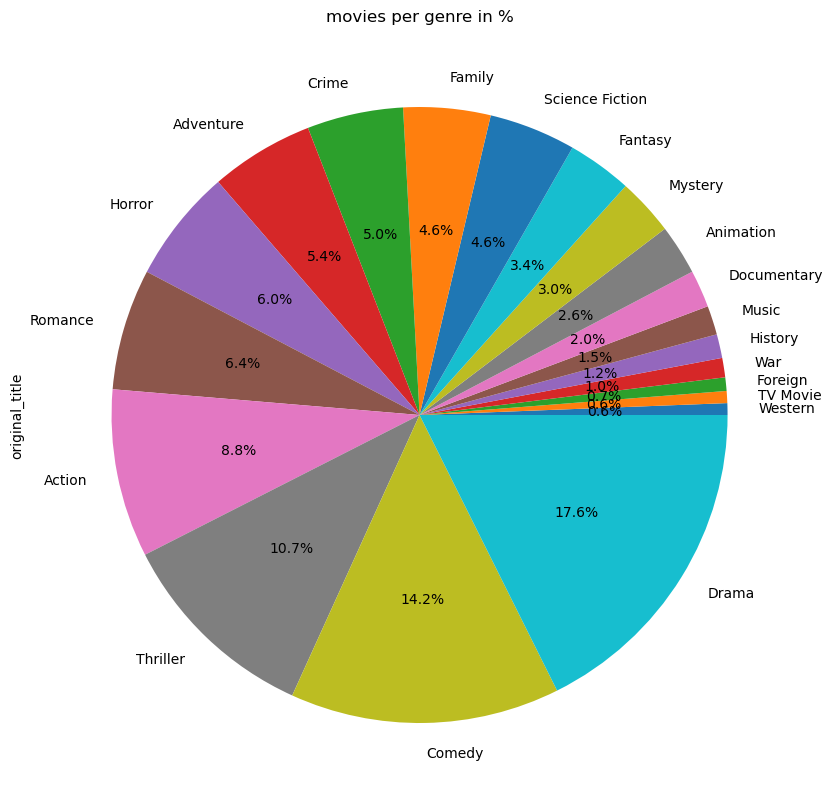

In [18]:
genres_count['original_title'].plot.pie(title = 'movies per genre in %', autopct ='%1.1f%%',figsize = (10,10))

<AxesSubplot:title={'center':'Movies per Genre'}, ylabel='genres_split'>

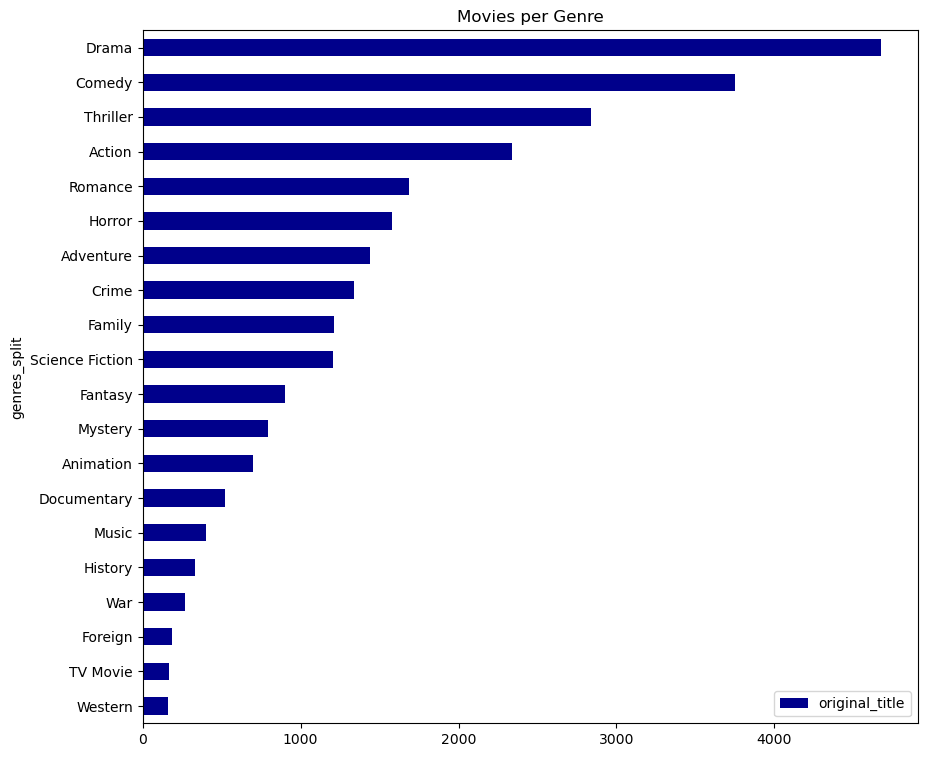

In [19]:
genres_count.plot.barh(title = 'Movies per Genre', color = 'DarkBlue', figsize = (10,9))

In [20]:
#we can answer by percentages of whole data set or the count of movies in each genre

based on this we know that the most common movies are Drama, which take up 17.6% of the data set and have a count of 4672 movies.
The least common genre of movies are westerns which take up .06% of the dataset and count for a total of 163 movies

In [21]:
#which genres have a high avg. budget and revenue

In [22]:
genres_avg = movies_genre.groupby('genres_split').mean()
pd.options.display.float_format = '{:2f}'.format

In [23]:
genres_avg

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
genres_split,,,,,,,
Action,0.926274,27727820.331376,72794732.002517,104.917785,392.993708,5.787752,45066911.671141
Adventure,1.154259,37543694.530931,113137861.069341,106.173351,513.125085,5.940585,75594166.538409
Animation,0.852182,23159781.606581,75256062.223176,68.181688,303.000000,6.403147,52096280.616595
Comedy,0.592607,13297915.618244,37526242.072238,96.745057,176.436330,5.905167,24228326.453994
Crime,0.744930,17663801.124815,42368661.645495,106.917282,278.805022,6.124889,24704860.520679
Documentary,0.181432,577149.148077,2041106.994231,102.651923,35.105769,6.908462,1463957.846154
Drama,0.591495,11880717.773529,29232255.725840,110.478151,182.544538,6.165546,17351537.952311
Family,0.786668,23359337.420796,72433176.373680,89.603574,272.320877,5.997563,49073838.952884
Fantasy,0.992840,32612585.348253,96313657.081878,100.736900,420.741266,5.863537,63701071.733624


In [24]:
genres_avg.sort_values('budget', ascending = True, inplace = True)

<AxesSubplot:title={'center':'Budget, Revenue by Genre'}, ylabel='genres_split'>

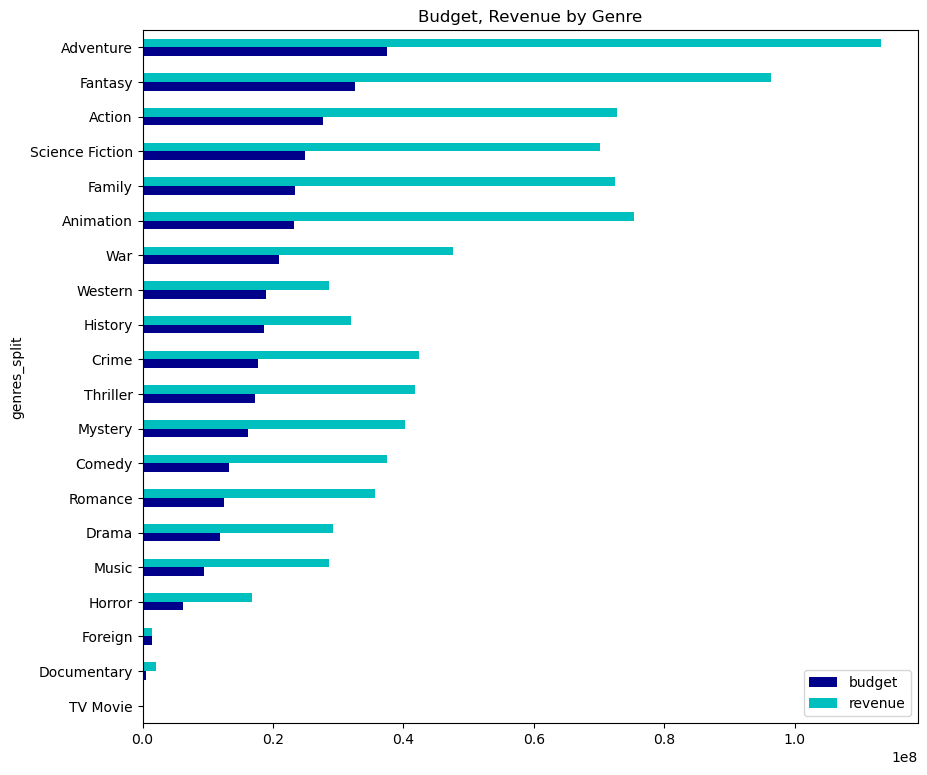

In [25]:
genres_avg[['budget', 'revenue']].plot.barh(title = 'Budget, Revenue by Genre', color = ('DarkBlue', 'c'),figsize = (10,9)) 

In [26]:
#Which genres have the highest abverage profit 

In [27]:
genres_avg.sort_values('profit', ascending = True, inplace = True)

<AxesSubplot:title={'center':'Profit by Genre'}, ylabel='genres_split'>

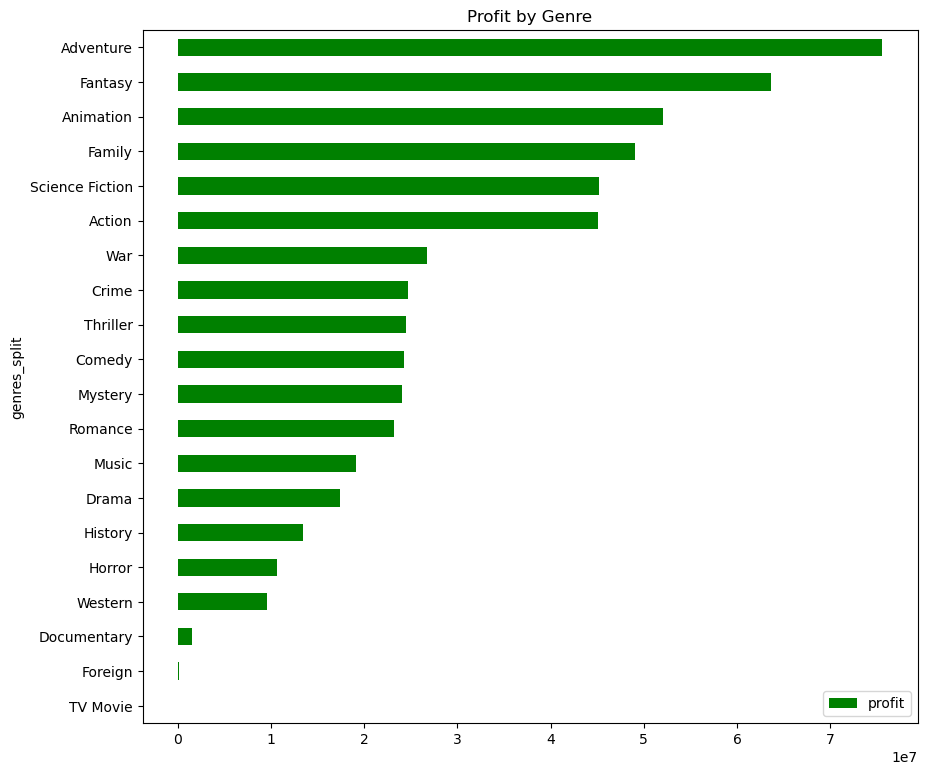

In [28]:
genres_avg[['profit']].plot.barh(title = 'Profit by Genre', color = ('g'),figsize = (10,9)) 

In [29]:
#which genres have high avg. popularity?


In [30]:
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500000,2015,137999939.280026,1392445892.523800,1363528810
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.100000,2015,137999939.280026,348161292.489031,228436354
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.300000,2015,101199955.472019,271619025.407628,185238201
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.500000,2015,183999919.040035,1902723129.801820,1868178225
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.300000,2015,174799923.088033,1385748801.470520,1316249360


In [31]:
genres_avg.sort_values('popularity', ascending = True, inplace = True)

<AxesSubplot:title={'center':'Average Popularity by Genre'}, ylabel='genres_split'>

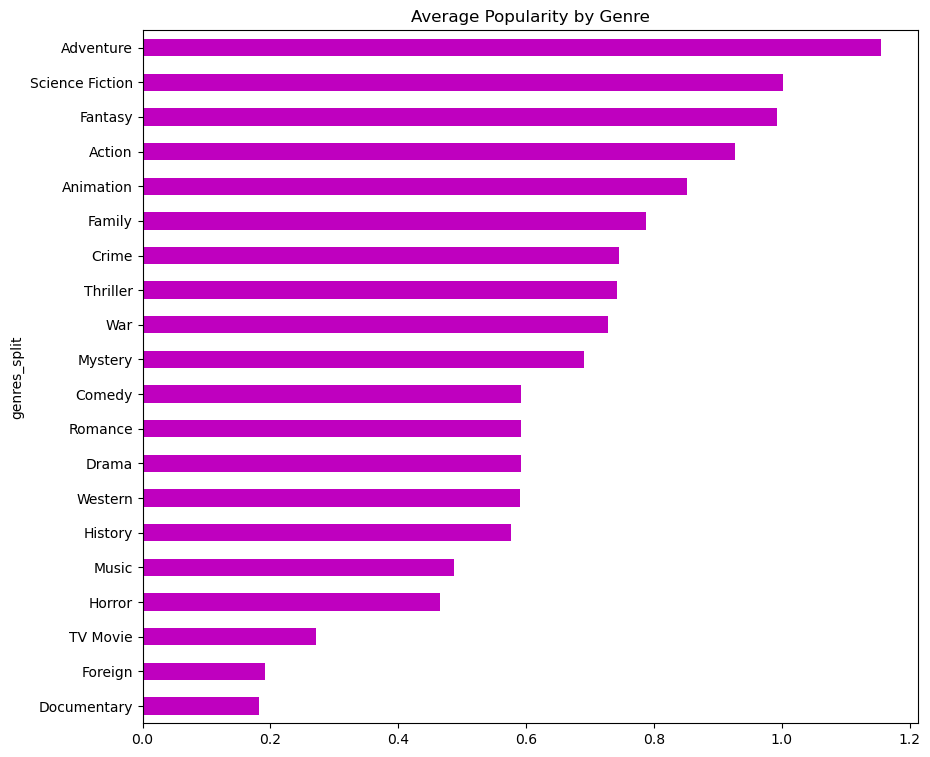

In [32]:
genres_avg['popularity'].plot.barh(title = 'Average Popularity by Genre', color = ('m'),figsize = (10,9)) 

In [33]:
#which genres have highest number of movies with a voting average >= 8?

In [34]:
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,release_date,director,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,Colin Trevorrow,5562,6.500000,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,Colin Trevorrow,5562,6.500000,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,Colin Trevorrow,5562,6.500000,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,Colin Trevorrow,5562,6.500000,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,5/13/15,George Miller,6185,7.100000,228436354,Action


In [35]:
vote_fifty = movies_genre[(movies_genre['vote_count'] >= 50) & (movies_genre['vote_average'] >= 8)]
vote_zero = movies_genre[movies_genre['vote_average'] >= 8]

In [36]:
genres_vote_zero = pd.DataFrame(vote_zero.groupby('genres_split').vote_average.nunique()).sort_values('vote_average' , ascending= True)

In [37]:
genres_vote_zero

,vote_average
genres_split,
Family,1
Action,2
Mystery,2
History,2
Fantasy,2
Adventure,2
War,2
Horror,3
Romance,3


<AxesSubplot:title={'center':'Vote Average by Genre W/ any number of votes'}, ylabel='genres_split'>

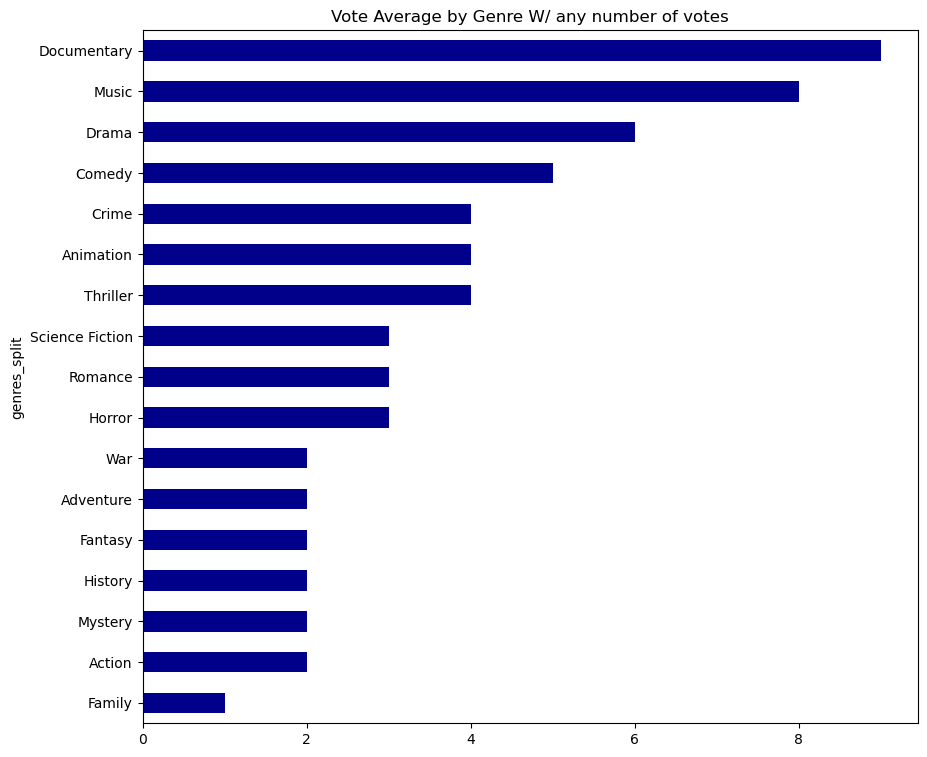

In [38]:
genres_vote_zero['vote_average'].plot.barh(title = 'Vote Average by Genre W/ any number of votes', color = ('DarkBlue'),figsize = (10,9)) 

In [39]:
genres_vote_fifty = pd.DataFrame(vote_fifty.groupby('genres_split').vote_average.nunique()).sort_values('vote_average' , ascending= True)
genres_vote_fifty

,vote_average
genres_split,
Fantasy,1
Science Fiction,1
Animation,1
Mystery,1
Horror,1
Family,1
Romance,2
Music,2
History,2


<AxesSubplot:title={'center':'Vote Average by Genre W/ any number of votes'}, ylabel='genres_split'>

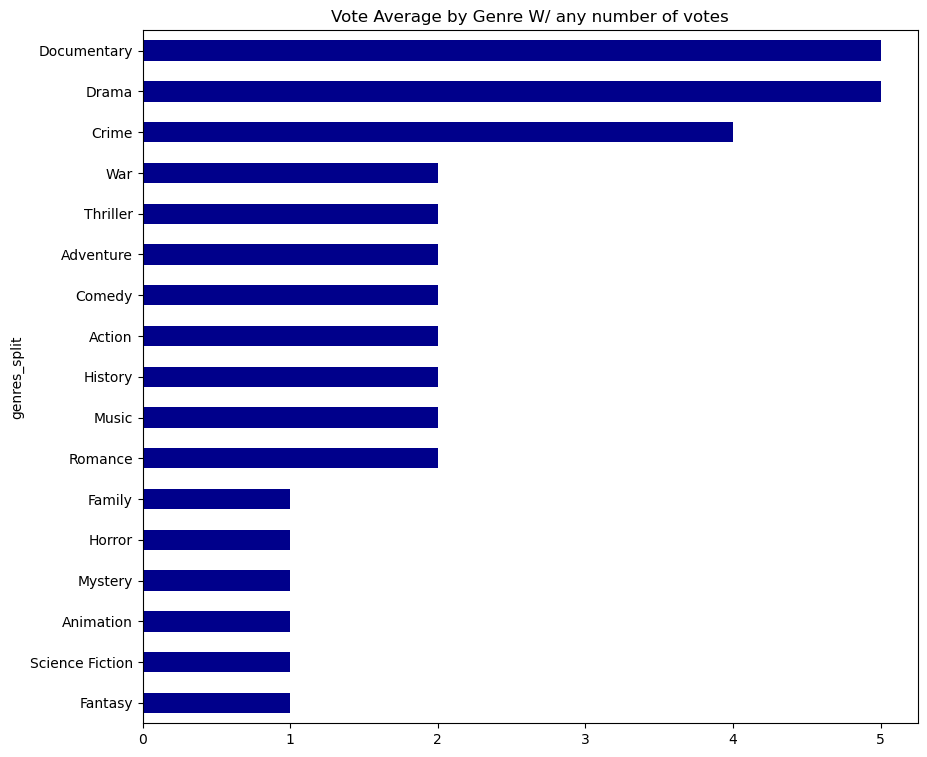

In [40]:
genres_vote_fifty['vote_average'].plot.barh(title = 'Vote Average by Genre W/ any number of votes', color = ('DarkBlue'),figsize = (10,9)) 

In [41]:
#The best movies according to voting average return high profit and revenue.
#the best movies according to popularity return high profit and revenue.
#Highly budgeted movies return high revenue and profit.
#Highly budgeted movies have a high popularity.


In [42]:
#no longer need the genres_split column so circling back to reuse dataframes and repurpose them
#now only have 1 title per row and is more usable for the questions above

#will now be solving for best according to voting average and profit and revenue

movies.drop_duplicates(inplace = True)
movies['profit'] = movies['revenue'] - movies['budget']
movies_genre = movies[['popularity', 'budget', 'revenue', 'original_title', 'runtime', 'genres', 'release_date', 'director', 'vote_count', 'vote_average', 'profit']]

In [43]:
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,director,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,Colin Trevorrow,5562,6.500000,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,George Miller,6185,7.100000,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,Robert Schwentke,2480,6.300000,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,J.J. Abrams,5292,7.500000,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,James Wan,2947,7.300000,1316249360


In [44]:
#the best movies according to the voting average return high profit and revenue?

movies_counted = movies_genre[(movies_genre['vote_count'] >= 50)]

movies_counted.corr(method = 'spearman')
#spearmen will account for outliers better

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
popularity,1.000000,0.484952,0.588594,0.230214,0.768888,0.189226,0.498092
budget,0.484952,1.000000,0.714733,0.360001,0.554412,-0.044050,0.334345
revenue,0.588594,0.714733,1.000000,0.341469,0.682550,0.112201,0.842278
runtime,0.230214,0.360001,0.341469,1.000000,0.263164,0.286082,0.211947
vote_count,0.768888,0.554412,0.682550,0.263164,1.000000,0.285084,0.583606
vote_average,0.189226,-0.044050,0.112201,0.286082,0.285084,1.000000,0.198580
profit,0.498092,0.334345,0.842278,0.211947,0.583606,0.198580,1.000000


based on this graph there is a slight positive correlation between vote average and profit as well as a slight correlation between revenue and vote average

<AxesSubplot:xlabel='vote_average', ylabel='profit'>

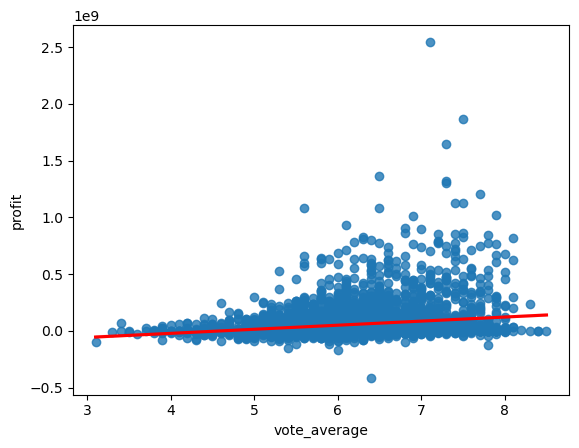

In [45]:
sns.regplot(x = 'vote_average', y = 'profit', data = movies_counted, line_kws = {'color':'red'})

<AxesSubplot:xlabel='vote_average', ylabel='revenue'>

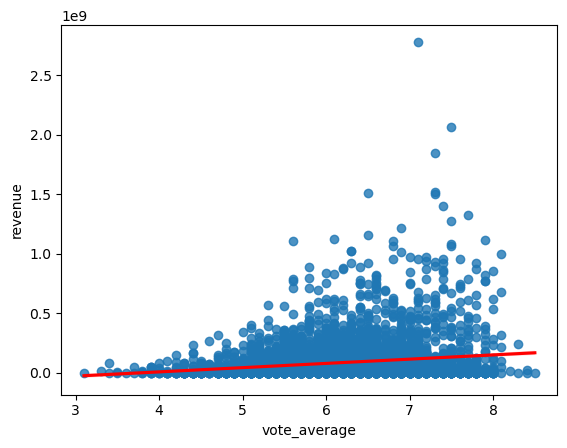

In [46]:
sns.regplot(x = 'vote_average', y = 'revenue', data = movies_counted, line_kws = {'color':'red'})

In [47]:
#will now be solving for best movie from popularity and revenue and profit

movies_counted.corr(method = 'spearman')



,popularity,budget,revenue,runtime,vote_count,vote_average,profit
popularity,1.000000,0.484952,0.588594,0.230214,0.768888,0.189226,0.498092
budget,0.484952,1.000000,0.714733,0.360001,0.554412,-0.044050,0.334345
revenue,0.588594,0.714733,1.000000,0.341469,0.682550,0.112201,0.842278
runtime,0.230214,0.360001,0.341469,1.000000,0.263164,0.286082,0.211947
vote_count,0.768888,0.554412,0.682550,0.263164,1.000000,0.285084,0.583606
vote_average,0.189226,-0.044050,0.112201,0.286082,0.285084,1.000000,0.198580
profit,0.498092,0.334345,0.842278,0.211947,0.583606,0.198580,1.000000


In [48]:
#shows a correlation of 0.588 for popularity to budget(moderate to strong) 
#and a correlation of 0.498 for popularity to profit(moderate)

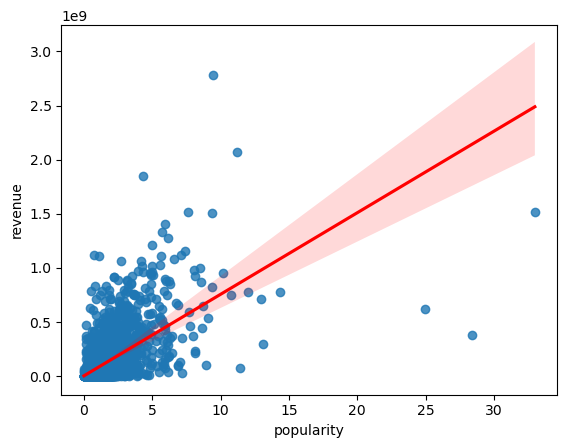

<Figure size 2000x2000 with 0 Axes>

In [49]:
sns.regplot(x = 'popularity', y = 'revenue', data = movies_counted, line_kws = {'color':'red'})
plt.figure(figsize = (20, 20))
plt.show()


#showcases fairly accurate correlation but as the popularity goes up,
#the regression becomes less accurate and creates a wider range of expected values

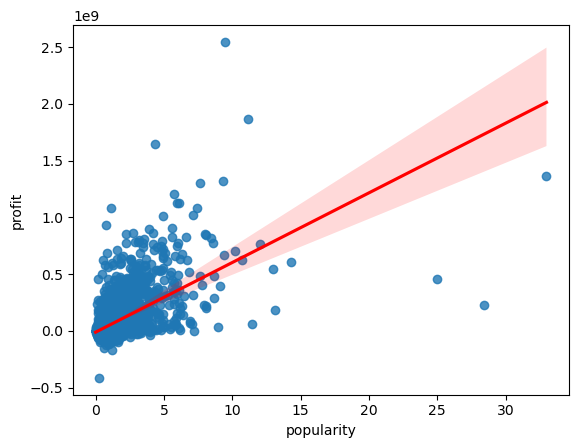

<Figure size 2000x2000 with 0 Axes>

In [50]:
sns.regplot(x = 'popularity', y = 'profit', data = movies_counted, line_kws = {'color':'red'})
plt.figure(figsize = (20, 20))
plt.show()

#similar results to the popularity to revenue

In [51]:
#starting to solve for highly budgeted movies return high profit?

movies_counted.head()


,popularity,budget,revenue,original_title,runtime,genres,release_date,director,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,Colin Trevorrow,5562,6.500000,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,George Miller,6185,7.100000,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,Robert Schwentke,2480,6.300000,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,J.J. Abrams,5292,7.500000,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,James Wan,2947,7.300000,1316249360


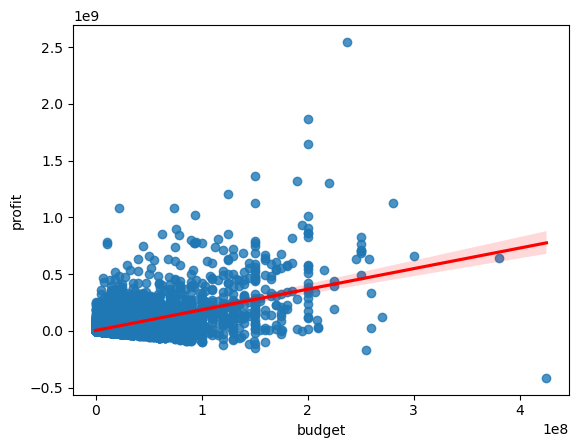

<Figure size 2000x2000 with 0 Axes>

In [52]:
sns.regplot(x = 'budget', y = 'profit', data = movies_counted, line_kws = {'color':'red'})
plt.figure(figsize = (20, 20))
plt.show()

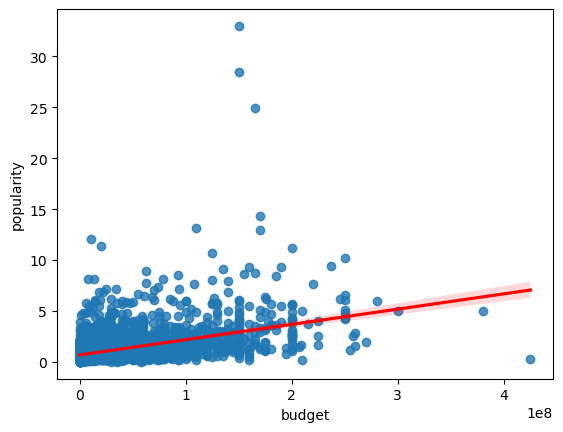

<Figure size 1000x500 with 0 Axes>

In [53]:
#solve for high budget to popularity?

sns.regplot(x = 'budget', y = 'popularity', data = movies_counted, line_kws = {'color':'red'})
plt.figure(figsize = (10, 5))
plt.show()

In [54]:
#take a look at genre profit each year

In [55]:
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,director,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,Colin Trevorrow,5562,6.500000,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,George Miller,6185,7.100000,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,Robert Schwentke,2480,6.300000,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,J.J. Abrams,5292,7.500000,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,James Wan,2947,7.300000,1316249360


In [56]:
movies_genre = movies[['popularity', 'budget', 'revenue', 'original_title', 'runtime', 'genres', 'release_year', 'director', 'vote_count', 'vote_average', 'profit']]
#rename release_datge column to release year

split = movies_genre['genres'].str.split('|').apply(Series, 1).stack()
split.index = split.index.droplevel(-1)
split

split.name = 'genres_split'
del movies_genre['genres']
movies_genre = movies_genre.join(split)

#reused code to split genres


In [57]:
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,release_year,director,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,2015,Colin Trevorrow,5562,6.500000,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,2015,Colin Trevorrow,5562,6.500000,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,2015,Colin Trevorrow,5562,6.500000,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,2015,Colin Trevorrow,5562,6.500000,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,2015,George Miller,6185,7.100000,228436354,Action


In [58]:
time_genre = pd.DataFrame(movies_genre.groupby(['release_year', 'genres_split'])['profit'].mean())

In [59]:
time_genre

profit
release_year genres_split                    
1960         Action            6363125.000000
             Adventure          431000.000000
             Comedy            5258750.000000
             Crime                   0.000000
             Drama             8245619.384615
             Family            3333333.333333
             Fantasy           -375000.000000
             Foreign                 0.000000
             History           9600000.000000
             Horror            4389007.428571
             Music                   0.000000
             Romance           5225000.000000
             Science Fiction   -316666.666667
             Thriller          5028842.000000
             War                     0.000000
             Western            484166.666667
1961         Action            2457142.857143
             Adventure        39130002.333333
             Animation       211880014.000000
             Comedy           22198001.400000
             Crime            18828411.000000
             Drama             4912698.375000
             Family           42576002.800000
             Fantasy                 0.000000
             Foreign                 0.000000
             History           2333333.333333
             Horror             600000.000000
             Music            18828411.000000
             Mystery                 0.000000
             Romance            214285.714286
             Science Fiction         0.000000
             War              11450000.000000
             Western           -566666.666667
1962         Action           10437500.000000
             Adventure        21214285.714286
             Comedy            1599974.800000
             Crime             3709948.666667
             Drama             4373796.190476
             Family            4000000.000000
             Fantasy              -126.000000
             Foreign              -126.000000
             History          11250000.000000
             Horror             231600.000000
             Music             8000000.000000
             Mystery           -245000.000000
             Romance           -400025.200000
             Science Fiction    -31000.000000
             Thriller          7902857.142857
             War              15000000.000000
             Western          13266666.666667
1963         Action           14999691.250000
             Adventure         9428395.000000
             Animation               0.000000
             Comedy             765591.923077
             Crime              369526.750000
             Drama             1587307.692308
             Family            -333333.333333
             Fantasy           -500000.000000
             Foreign                 0.000000
             History           4908750.000000
             Horror             898558.777778
             Mystery           1568014.666667
             Romance           4388698.500000
             Science Fiction   -375000.000000
             Thriller          8612335.300000
             War               1000000.000000
             Western                 0.000000
1964         Action           24280000.000000
             Adventure        24123400.000000
             Animation               0.000000
             Comedy            7080111.375000
             Crime             1723307.300000
             Drama             3726105.550000
             Family           37818181.750000
             Fantasy          24068181.750000
             Foreign                 0.000000
             History                 0.000000
             Horror             -10833.333333
             Music            30354655.200000
             Mystery           1216209.750000
             Romance           6722222.222222
             Science Fiction   -300000.000000
             Thriller         14029426.555556
             War               2546757.333333
             Western                 0.000000
1965         Action           1610450

In [60]:
final_genre = pd.pivot_table(time_genre, values = 'profit', index = ['genres_split'], columns = ['release_year'])
final_genre

release_year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
genres_split,,,,,,,,,,,,,,,,,,,,,,,
Action,6363125.000000,2457142.857143,10437500.000000,14999691.250000,24280000.000000,16104504.777778,324785.714286,21732786.428571,8868478.833333,5861449.300000,7735913.454545,...,32379154.185714,38048623.212500,45977444.052632,47642764.404040,57555510.740741,34571030.355140,51968078.252174,71910257.424242,47431725.628099,69943650.015504,90399046.747664
Adventure,431000.000000,39130002.333333,21214285.714286,9428395.000000,24123400.000000,25124276.333333,791563.636364,49281873.857143,15122159.400000,16651809.400000,11406377.666667,...,70756754.320755,64895200.090909,83916731.083333,55016526.809524,113364919.736111,98125646.677966,113343224.564516,162549574.300000,100638113.402985,120373306.985075,144787868.971014
Animation,NaN,211880014.000000,NaN,0.000000,0.000000,0.000000,-105000.000000,100921706.000000,0.000000,0.000000,25837628.500000,...,40307312.153846,39047734.974359,67147670.531250,51907242.575758,48862898.250000,58455658.640000,63420098.934783,69231546.875000,93718795.261905,64313463.250000,83691174.384615
Comedy,5258750.000000,22198001.400000,1599974.800000,765591.923077,7080111.375000,3264285.714286,-149550.000000,10135087.470588,-1277777.777778,-125000.000000,11901488.583333,...,22147617.440559,24944308.174194,30674848.549669,21483012.426036,24741982.808081,23154807.875740,27241358.720930,25631999.136364,25068455.091429,26648786.864865,33703819.067901
Crime,0.000000,18828411.000000,3709948.666667,369526.750000,1723307.300000,-22500.000000,-275560.000000,12899678.714286,6762174.600000,31482963.000000,-2125000.000000,...,15680793.688889,21551432.962264,16700048.400000,31258696.854839,11016642.307692,13490412.320000,25395271.625000,29522925.555556,23248589.507042,5903014.230769,61286524.372549
Documentary,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,...,316012.705882,6772940.000000,5229344.631579,321262.230769,-1603933.560000,187417.771429,2567196.816327,1102306.591837,321880.225806,13104.136986,531061.859649
Drama,8245619.384615,4912698.375000,4373796.190476,1587307.692308,3726105.550000,11933809.800000,1014793.062500,18045095.000000,6354859.150000,10317995.538462,19753262.842105,...,17180823.510989,12994800.142132,13953425.421320,16736384.017167,15209056.888393,13510589.176190,10830976.523364,23418944.870690,13344942.608696,13697098.665493,16315310.438462
Family,3333333.333333,42576002.800000,4000000.000000,-333333.333333,37818181.750000,51671428.666667,-341828.571429,64281204.000000,-640000.000000,0.000000,17225085.666667,...,51714774.929825,35281751.276923,80470561.733333,44483026.142857,62009322.100000,98999767.490909,65483435.472222,69321493.023810,89321956.437500,56295182.744186,85974520.750000
Fantasy,-375000.000000,0.000000,-126.000000,-500000.000000,24068181.750000,NaN,0.000000,-3000000.000000,-2000000.000000,0.000000,0.000000,...,64388182.000000,57967661.441176,93461583.425532,51441997.767442,96235822.102041,83235328.522727,94486677.847826,122245621.970588,79363628.000000,112966482.638889,86576948.303030


Text(0.5, 1.0, 'Genres by Profit per Year')

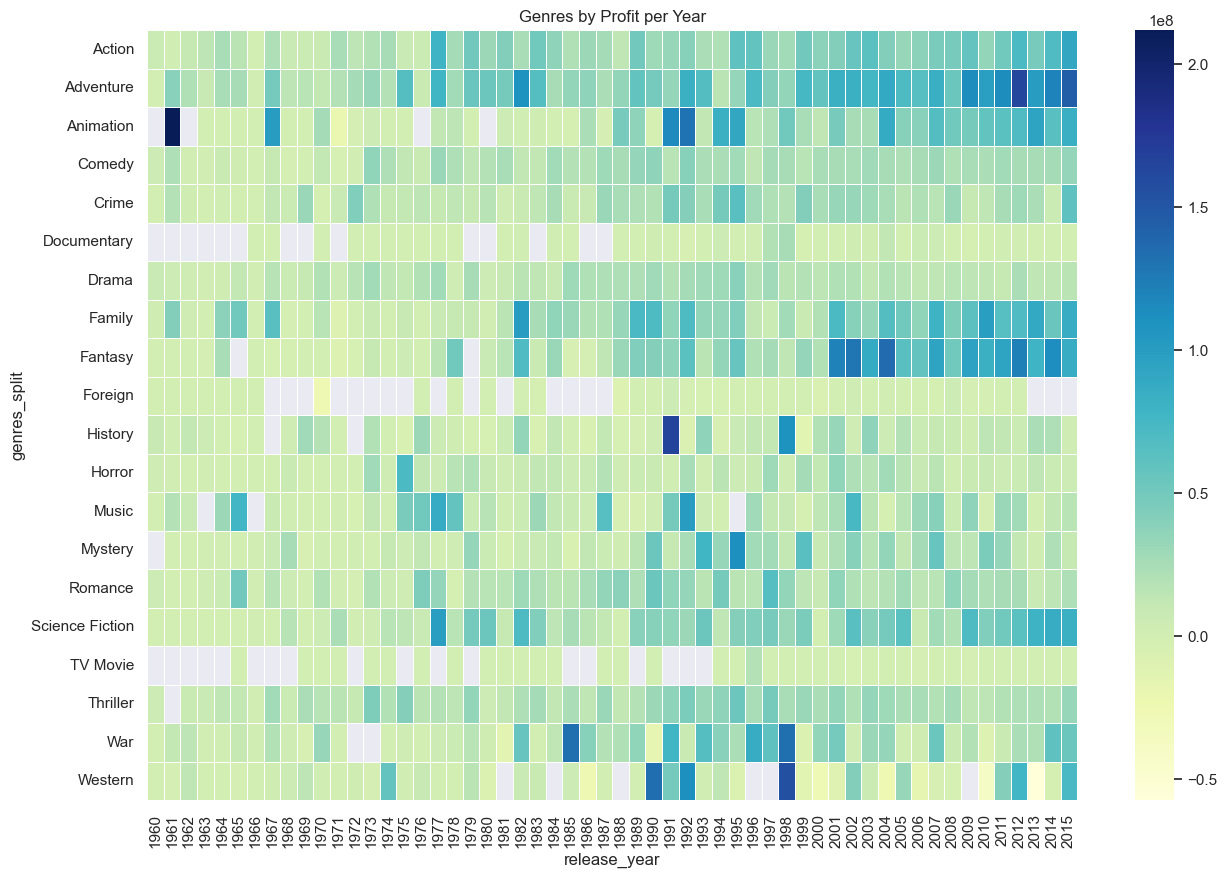

In [61]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(final_genre, cmap = 'YlGnBu', linewidths = .5)
plt.title('Genres by Profit per Year')

In [62]:
# Group by 'director' and aggregate total stats
director_stats = movies.groupby('director').agg(
    total_revenue=('revenue', 'sum'),
    total_profit=('profit', 'sum'),
    movie_count=('revenue', 'count')
).reset_index()

# Calculate average revenue and average profit per movie
director_stats['average_revenue'] = director_stats['total_revenue'] / director_stats['movie_count']
director_stats['average_profit'] = director_stats['total_profit'] / director_stats['movie_count']

# Format all numeric values to include commas and round to two decimal places
director_stats = director_stats.round(2)  # Rounds to 2 decimal places
director_stats['total_revenue'] = director_stats['total_revenue'].apply(lambda x: f"{x:,.2f}")
director_stats['total_profit'] = director_stats['total_profit'].apply(lambda x: f"{x:,.2f}")
director_stats['average_revenue'] = director_stats['average_revenue'].apply(lambda x: f"{x:,.2f}")
director_stats['average_profit'] = director_stats['average_profit'].apply(lambda x: f"{x:,.2f}")

director_stats = director_stats.sort_values(by='total_revenue', ascending=False)

In [66]:
director_stats = director_stats.sort_values(by='total_revenue', ascending=False)
director_stats.head(20)

,director,total_revenue,total_profit,movie_count,average_revenue,average_profit
3733,Paul Verhoeven,"999,023,731.00","620,523,731.00",7,"142,717,675.86","88,646,247.29"
3700,Paul Greengrass,"998,266,568.00","683,266,568.00",6,"166,377,761.33","113,877,761.33"
3233,Matthew Vaughn,"991,821,390.00","646,321,390.00",5,"198,364,278.00","129,264,278.00"
4995,Xavier Gens,"99,987,753.00","69,987,753.00",3,"33,329,251.00","23,329,251.00"
4578,Steven E. de Souza,"99,423,521.00","64,423,521.00",1,"99,423,521.00","64,423,521.00"
2228,Jerry Paris,"99,179,163.00","99,179,163.00",2,"49,589,581.50","49,589,581.50"
4632,Sylvain White,"99,091,123.00","61,091,123.00",3,"33,030,374.33","20,363,707.67"
4631,Sydney Pollack,"988,496,251.00","680,496,251.00",13,"76,038,173.15","52,345,865.46"
1547,Frank Coraci,"985,606,368.00","572,106,368.00",8,"123,200,796.00","71,513,296.00"
3501,Ned Benson,"985,007.00","985,007.00",3,"328,335.67","328,335.67"


In [64]:
director_stats = director_stats.sort_values(by='total_profit', ascending=False)
director_stats.head(20)

,director,total_revenue,total_profit,movie_count,average_revenue,average_profit
5032,Zack Snyder,"1,602,937,193.00","992,937,193.00",6,"267,156,198.83","165,489,532.17"
1191,David Twohy,"304,804,259.00","99,804,259.00",6,"50,800,709.83","16,634,043.17"
4957,William Dear,"111,903,034.00","99,403,034.00",7,"15,986,147.71","14,200,433.43"
2228,Jerry Paris,"99,179,163.00","99,179,163.00",2,"49,589,581.50","49,589,581.50"
4062,Rob Zombie,"137,670,802.00","99,170,802.00",6,"22,945,133.67","16,528,467.00"
3501,Ned Benson,"985,007.00","985,007.00",3,"328,335.67","328,335.67"
1357,Dwight H. Little,"175,934,241.00","98,934,241.00",8,"21,991,780.12","12,366,780.12"
2135,Jean-Jacques Annaud,"373,252,002.00","98,752,002.00",5,"74,650,400.40","19,750,400.40"
2773,Kevin Rodney Sullivan,"171,658,650.00","98,658,650.00",3,"57,219,550.00","32,886,216.67"
4185,Ron Shelton,"264,310,669.00","98,310,669.00",6,"44,051,778.17","16,385,111.50"


In [65]:
director_stats = director_stats.sort_values(by='average_profit', ascending=False)
director_stats.head(20)

,director,total_revenue,total_profit,movie_count,average_revenue,average_profit
3529,Nicholas Stoller,"517,269,922.00","399,269,922.00",4,"129,317,480.50","99,817,480.50"
320,Anthony Minghella,"542,763,028.00","396,763,028.00",4,"135,690,757.00","99,190,757.00"
3775,Peter Farrelly|Bobby Farrelly,"149,270,999.00","98,270,999.00",1,"149,270,999.00","98,270,999.00"
2474,John Ridley,97.00,97.00,1,97.00,97.00
4600,Stiles White,"102,529,779.00","97,529,779.00",1,"102,529,779.00","97,529,779.00"
2387,John Ford,"8,000,000.00","4,800,000.00",5,"1,600,000.00","960,000.00"
2517,Jon M. Chu,"782,760,425.00","581,760,425.00",6,"130,460,070.83","96,960,070.83"
3436,Mike Newell,"1,545,797,942.00","1,061,797,942.00",11,"140,527,085.64","96,527,085.64"
3504,Neil Burger,"537,512,367.00","385,512,367.00",4,"134,378,091.75","96,378,091.75"
1053,Darren Aronofsky,"761,061,349.00","577,501,349.00",6,"126,843,558.17","96,250,224.83"
